In [4]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [5]:
# Last time we ended up looking at the following table whose 
# rows (indivuals) represent movies.

# What column is a numerical attribute?
# What column is a Categorical attribute?

top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


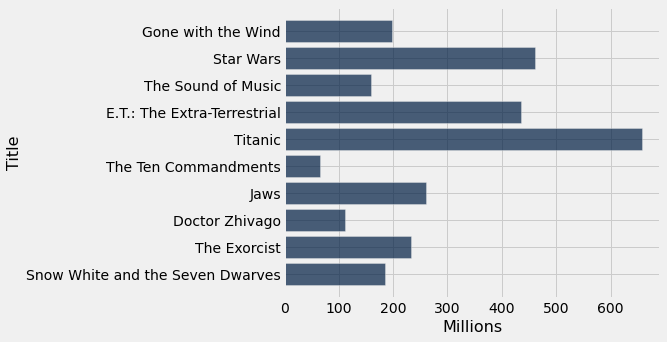

In [6]:
# To visualize a catergorical variable vs a numerical one we use bar graphs
# We will compare the movies title vs the total gross
#lets get gross per million
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross')/1000000,3))
#lets look at the top ten! 
top_movies.take(np.arange(10)).barh('Title', 'Millions')

In [7]:
# Now lets talk about distributions
# Distributions tell us the frequency when an event occurs
# For example: The number of times a movie company produces a film!


studios = top_movies.select('Studio')
studios
# Count the number of studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [8]:
# Lets find the frequency of the number of times a company produces a film
studio_distribution = studios.group('Studio')

In [9]:
# Lets print out the result
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [10]:
#Count the number of studios
sum(studio_distribution.column('count'))

200

## Bar Charts ##

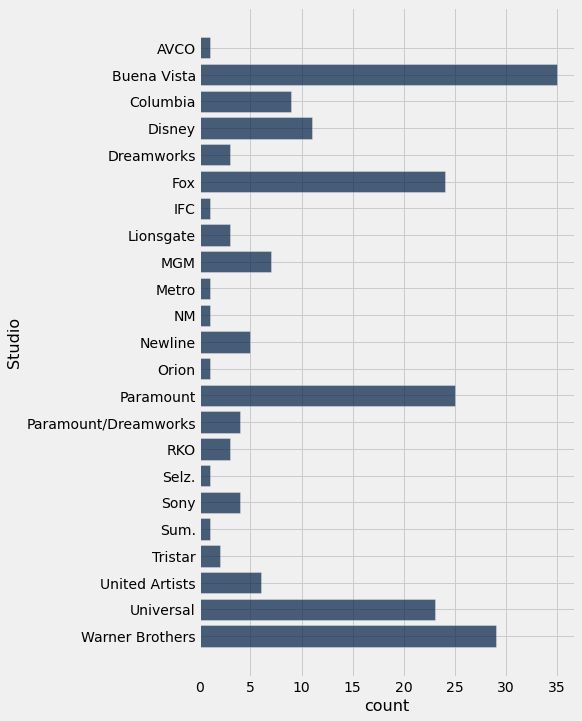

In [24]:
# Lets make a bar chart of the distribution
studio_distribution.barh('Studio','count')

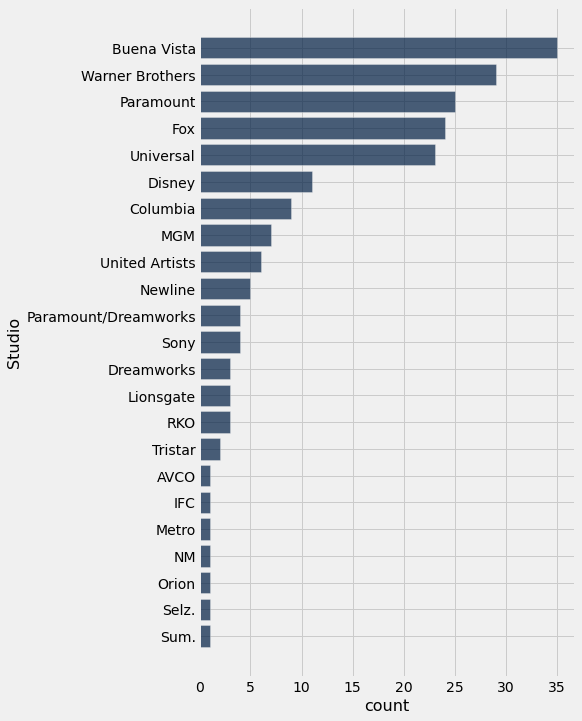

In [12]:
# Lets rearrange from least to greatest frequency 
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [13]:
#lets rearrange our data to look at a numerical
#distribution

# Find ages of movies
ages = 2021 - top_movies.column('Year')
# Add age column
top_movies = top_movies.with_column('Age', ages)

In [14]:
# The age of a movies and its frequency is an example of a numerical
#distribution
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,82
Star Wars,Fox,460998007,1583483200,1977,460.998,44
The Sound of Music,Fox,158671368,1266072700,1965,158.671,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,39
Titanic,Paramount,658672302,1204368000,1997,658.672,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,65
Jaws,Universal,260000000,1138620700,1975,260,46
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,56
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,84


## Binning ##

In [12]:
# to construct a histogram we must bin the data 
# and count number of elements in the bin

# find bound on bins 
min(ages), max(ages)

(2, 98)

In [21]:
# now wer are going count the number of movies that are of each age or bin
# we are using a new function .bin
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

#table().bin('Column_name'=variable we want to bin on, bins= 'how you want to bin' )
#note this creates a new Table!

binned_data = top_movies.bin('Age', bins = my_bins)
binned_data
top_movies.bin('Age', bins = my_bins)


# Note group method counts the number of tims 1 object appears
# bin counts the number of times objects appear in a certain range

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


In [16]:
# lets make bins that go up every 25 years
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,91
25,67
50,35
75,7
100,0


In [17]:
# lets make bins that go up every 25 years only counting movies from the last 
# 50 years
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,91
25,68
50,0


In [16]:
# any movies near 50? 
top_movies.where('Age', are.between(40,50))

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Star Wars,Fox,460998007,1583483200,1977,460.998,44
Jaws,Universal,260000000,1138620700,1975,260,46
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,48
The Empire Strikes Back,Fox,290475067,872825900,1980,290.475,41
The Sting,Universal,156000000,792480000,1973,156,48
Raiders of the Lost Ark,Paramount,248159971,787003100,1981,248.16,40
The Godfather,Paramount,134966411,701621600,1972,134.966,49
Grease,Paramount,188755690,684256200,1978,188.756,43
American Graffiti,Universal,115000000,584200000,1973,115,48
Blazing Saddles,Warner Brothers,119601481,562200300,1974,119.601,47


## Histograms ##

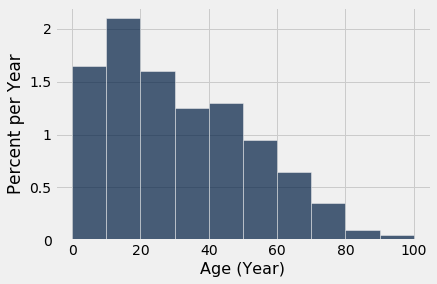

In [22]:
# Now that we can bin lets make a histogram
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

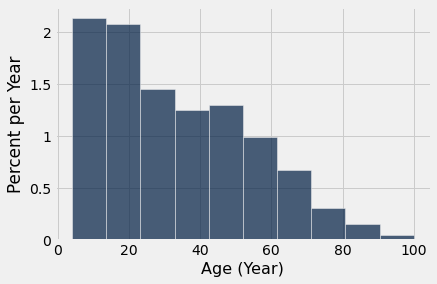

In [18]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [28]:
 # here is our bin infor

#before we viusalize this lets find the percentage of each bin

#step 1 compute total number of movies
sum(binned_data.column('Age count'))

#step 2 divide bins by total number of movies
binned_data.column('Age count')/200*100

#step 3 add to table

binned_data=binned_data.with_column('Percentage',binned_data.column('Age count')/200*100
)

binned_data

bin,Age count,Percent,Percentage
0,3,1.5,1.5
5,25,12.5,12.5
10,18,9,9
15,39,19.5,19.5
25,42,21,21
40,53,26.5,26.5
65,20,10,10
100,0,0,0


In [29]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

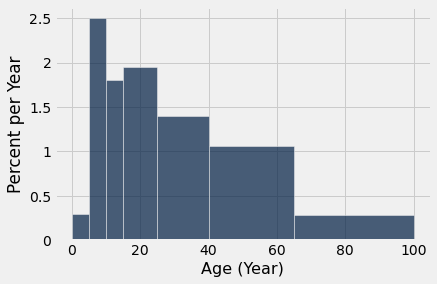

In [31]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')


## Height ##

### Question: What is the height of the [40, 65] bin?

In [26]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [27]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [28]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.02